#**Universidad Galileo**
##Statistical Learning II Tarea No 3
###César Luis Polanco
###20062088


In [40]:
#Cargar libreria
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

## Obtener datos

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


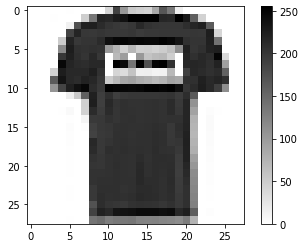

In [4]:
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()

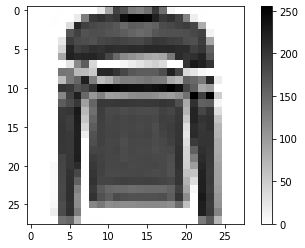

In [5]:
plt.imshow(train_images[5], cmap = 'binary')
plt.colorbar()

In [6]:
def plot_img(n):
  plt.figure(figsize=(8,8))

  for i in range(n):
    plt.subplot(n//3,n//3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])
  plt.show()

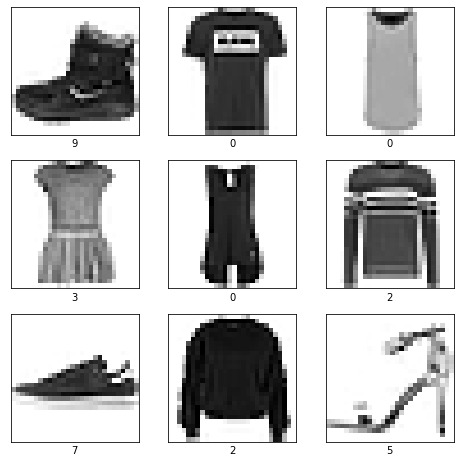

In [7]:
plot_img(9)

## Reduccion dimensionalidad

In [23]:
def PCA_Dim_Reduction(df,n=2):
  df_2D = df.reshape(-1, df.shape[1] * df.shape[2]).astype(float)

  mu = df_2D.mean(axis=0).reshape(1, df_2D.shape[1]) # media
  sd = df_2D.std(axis=0).reshape(1, df_2D.shape[1]) # desviación standar

  #normalizar dataset
  df_norm = (df_2D - mu) / sd

  # Calcular la matriz de covarianza
  sigma = np.cov(df_norm, rowvar = False)

  eigen_values , eigen_vectors = np.linalg.eigh(sigma)

  #Order de formar descendente
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigen = eigen_vectors[:,sorted_index]

  reduced = sorted_eigen[:,0:n] #Verctor reducido

  # Transformar datos
  data_reduced = np.matmul(reduced.T, df_norm.T).T
  df_reduced = pd.DataFrame(data_reduced, columns = ['PC1','PC2'])

  return df_reduced

In [35]:
test_PCA = PCA_Dim_Reduction(test_images)
test_PCA

,PC1,PC2
0,-16.812930,-7.211594
1,22.272440,-9.561994
2,3.924990,16.794870
3,-4.979114,16.840440
4,2.306663,0.354408
...,...,...
9995,-5.932138,-16.013988
9996,-11.599824,14.494563
9997,-6.940768,8.629264
9998,-2.835375,15.493498


## Grafica de resultado PCA

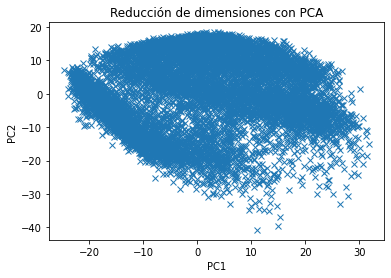

In [36]:
plt.plot(test_PCA['PC1'], test_PCA['PC2'],'x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Reducción de dimensiones con PCA')
plt.show()

## Implementación T-SNE SKLEARN

In [33]:
img_2d = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2]).astype(np.float32)
img_2d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
test_TSNE = TSNE(n_components=2, perplexity=50).fit_transform(img_2d)
test_TSNE = pd.DataFrame(test_TSNE, columns = ['PC1','PC2'])
test_TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,PC1,PC2
0,30.284122,39.180847
1,1.513596,-60.291721
2,-58.354607,31.596748
3,-49.085846,36.677334
4,13.745495,-29.362570
...,...,...
9995,15.307220,51.071342
9996,-42.016518,34.142708
9997,14.358891,3.816991
9998,-43.392586,45.508965


## Graficar resultado T-SNE

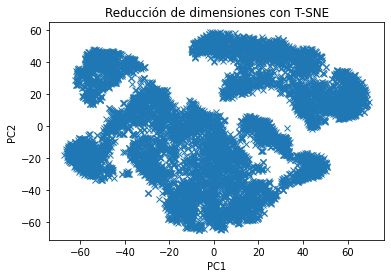

In [37]:
plt.plot(test_TSNE['PC1'], test_TSNE['PC2'],'x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Reducción de dimensiones con T-SNE')
plt.show()

## Cluster por GMM

In [39]:
def plot_GMM(gmm, df):
  clusters = gmm.predict(df)
  plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters)
  plt.scatter(gmm.means_[:,0], gmm.means_[:,1], s=100, c="red", label="Centroids")
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.title("Cluster GMM")
  plt.legend()
  plt.show()

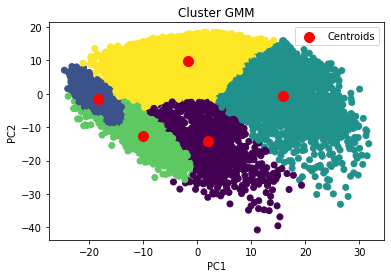

In [42]:
gmm_PCA = GaussianMixture(n_components=5, random_state=0).fit(test_PCA)
plot_GMM(gmm_PCA, test_PCA)

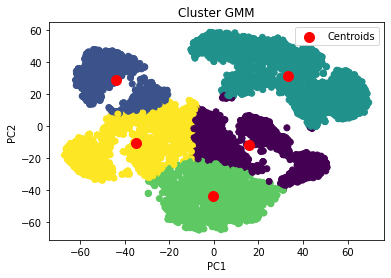

In [43]:
gmm_TSNE = GaussianMixture(n_components=5, random_state=0).fit(test_TSNE)
plot_GMM(gmm_TSNE, test_TSNE)

## Conclusiones

Al visualizar ambas gráficas (PCA y T-SNE) la implementación de PCA carece de uniformidad ya que los datos a pesar de estar normalizados fluctuan en ambas componenetes. Esta uniformidad se representa mejor en la gráfica de T-SNE donde se pude observar un que los valores encajan entre -60 a 60


Las gráficas de cluster se interpreta mejor con la implementación de T-SNE donde la segmentación se ve a primera vista. En el caso de PCA se observa una similitud entre 2 cluster lo cual podría complicar la implementación de las categorías (en este caso particular).